In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
from util import *
import numpy as np

## sine波の重ね合わせ
音は複数の周波数成分を含んでおり，複数の$sine$波を重ね合わせることで表現できる．  

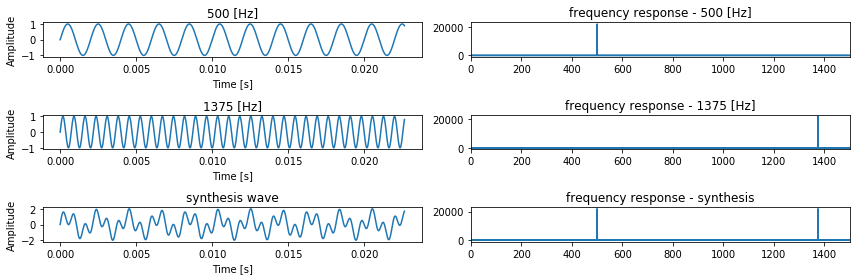

In [3]:
# 各sine波の生成
sr = 44100
t = np.arange(0, 1, 1/sr)
s_500 = sine_wave(500)
s_1375 = sine_wave(1375)
synth = s_500 + s_1375  # 合成波

# 周波数特性
amp_500, fr_500 = frequency_response(s_500)
amp_1375, fr_1375 = frequency_response(s_1375)
amp_synth, fr_synth = frequency_response(synth)

# プロット
plt.figure(figsize=(12, 4))
plt.subplot(321)
plot_signal(t, s_500, '500 [Hz]')
plt.subplot(322)
plot_normal(fr_500, amp_500, 'frequency response - 500 [Hz]')
plt.xlim(0, 1500)

plt.subplot(323)
plot_signal(t, s_1375, '1375 [Hz]')
plt.subplot(324)
plot_normal(fr_1375, amp_1375, 'frequency response - 1375 [Hz]')
plt.xlim(0, 1500)

plt.subplot(325)
plot_signal(t, synth, 'synthesis wave')
plt.subplot(326)
plot_normal(fr_synth, amp_synth, 'frequency response - synthesis')
plt.xlim(0, 1500)

plt.tight_layout()
plt.show()

In [11]:
display.Audio(synth, rate=sr)

### 周期的複合音
単純な$sine$波はただ一つの周波数成分しか含まないため**純音**と呼ばれる．これに対して，複数の$sine$波を重ね合わせたものは複数の周波数成分を含んでいることから**複合音**と呼ばれる．その中でも周波数成分が整数倍の関係になる**倍音**構造を示すものは，波形が周期的になるため**周期的複合音**と呼ばれる．

基本音だけではおとなしく聞こえる音色も，倍音を増やしていくことによってしだいに明るくなる．基本音は**音の高さ**，倍音の配合率は**音色**に対応する．

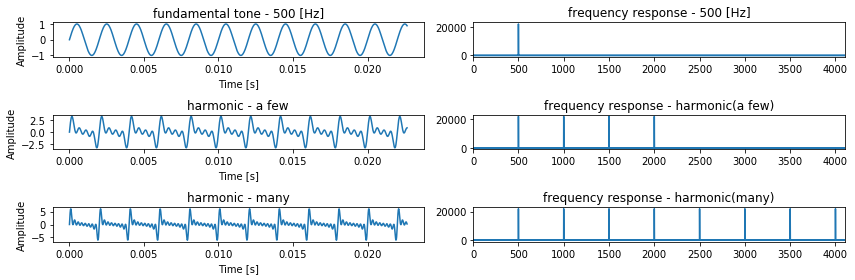

In [11]:
harmonic = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]

# 周期的複合音
synth1 = np.zeros([44100])
for i in harmonic[:4]:
    wave = sine_wave(i)
    synth1 += wave
amp_synth1, fr_synth1 = frequency_response(synth1)

synth2 = np.zeros([44100])
for i in harmonic:
    wave = sine_wave(i)
    synth2 += wave
amp_synth2, fr_synth2 = frequency_response(synth2)

# プロット
plt.figure(figsize=(12, 4))
plt.subplot(321)
plot_signal(t, s_500, 'fundamental tone - 500 [Hz]')
plt.subplot(322)
plot_normal(fr_500, amp_500, 'frequency response - 500 [Hz]')
plt.xlim(0, 4100)

plt.subplot(323)
plot_signal(t, synth1, 'harmonic - a few')
plt.subplot(324)
plot_normal(fr_synth1, amp_synth1, 'frequency response - harmonic(a few)')
plt.xlim(0, 4100)

plt.subplot(325)
plot_signal(t, synth2, 'harmonic - many')
plt.subplot(326)
plot_normal(fr_synth2, amp_synth2, 'frequency response - harmonic(many)')
plt.xlim(0, 4100)

plt.tight_layout()
plt.show()

In [12]:
display.Audio(s_500, rate=sr)  # 基本音

In [14]:
display.Audio(synth1, rate=sr)  # 倍音(少な目)

In [15]:
display.Audio(synth2, rate=sr)  # 倍音(多め)，明るく聞こえる

## ノコギリ波(sawtooth wave)
倍音を以下の式のように足し合わせた波．
$$ s(t) = \sin(2\pi f_0 t) + \frac{1}{2}\sin(2\pi f_1 t) + \frac{1}{3}\sin(2\pi f_2 t) + \cdots + \frac{1}{n}\sin(2\pi f_{n-1} t) $$
$sine$波に比べて明るい音色に聞こえる．

In [21]:
def sawtooth_wave(f_0, n):
    """
    create sawtooth wave.
    
    Parameters
    ----------
    f_0 : int
        fundamental frequency
    n : int
        including harmonic wave num
    """
    signal = np.zeros([44100])
    for i in range(1, n+1):
        signal += 1/i * sine_wave(f_0 * i)
    return signal

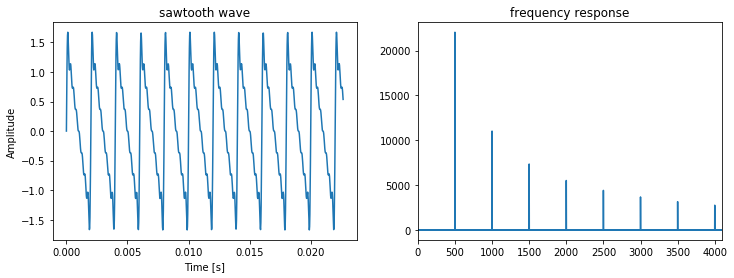

In [26]:
sawtooth = sawtooth_wave(500, 8)
amp_saw, fr_saw = frequency_response(sawtooth)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_signal(t, sawtooth, 'sawtooth wave')
plt.subplot(122)
plot_normal(fr_saw, amp_saw, 'frequency response')
plt.xlim(0, 4100)

plt.show()
display.Audio(sawtooth, rate=sr)

## 矩形波(square wave)
倍音を以下の式のように足し合わせた波．
$$ s(t) = \sin(2\pi f_0 t) + \frac{1}{3}\sin(2\pi f_2 t) + \frac{1}{5}\sin(2\pi f_4 t) + \cdots + \frac{1}{n}\sin(2\pi f_{n-1} t) $$
矩形波は奇数次の倍音しか含んでおらず，ノコギリ波同様$sine$波に比べると明るいが，うつろな音色に聞こえる．

In [28]:
def square_wave(f_0, n):
    """
    create square wave.
    
    Parameters
    ----------
    f_0 : int
        fundamental frequency
    n : int
        including harmonic wave num
    """
    signal = np.zeros([44100])
    for i in range(1, n+1):
        if i % 2 != 0:
            signal += 1/i * sine_wave(f_0 * i)
    return signal

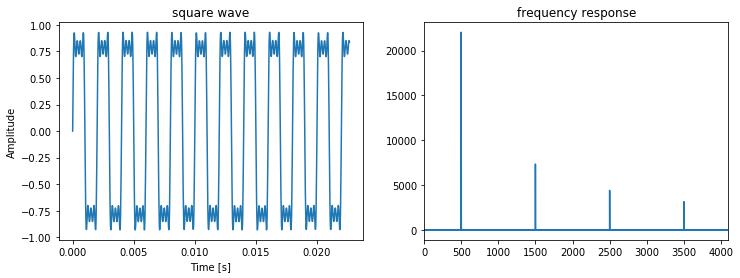

In [32]:
square = square_wave(500, 8)
amp_square, fr_square = frequency_response(square)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_signal(t, square, 'square wave')
plt.subplot(122)
plot_normal(fr_square, amp_square, 'frequency response')
plt.xlim(0, 4100)

plt.show()
display.Audio(square, rate=sr)

## 三角波(triangle wave)
倍音を以下の式のように足し合わせた波．
$$ s(t) = \sin(2\pi f_0 t) - \frac{1}{3^2}\sin(2\pi f_2 t) + \frac{1}{5^2}\sin(2\pi f_4 t) - \cdots + \sin \left( \frac {n\pi}{2} \right) \frac{1}{n^2} \sin(2\pi f_{n-1} t) $$
矩形波同様に奇数次の倍音のみを含んでおり，周波数が高くなるにつれて急激に振幅が小さくなることが特徴．矩形波ほど倍音が目立たず，おとなしい音色に聞こえる．

In [39]:
def triangle_wave(f_0, n):
    """
    create triangle wave.
    
    Parameters
    ----------
    f_0 : int
        fundamental frequency
    n : int
        including harmonic wave num
    """
    signal = np.zeros([44100])
    for i in range(1, n+1):
        if i % 2 != 0:
            signal += np.sin(i * np.pi / 2) * 1/i**2 * sine_wave(f_0 * i)
    return signal

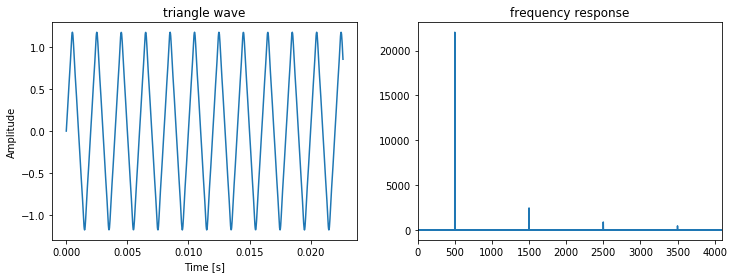

In [40]:
triangle = triangle_wave(500, 8)
amp_triangle, fr_triangle = frequency_response(triangle)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_signal(t, triangle, 'triangle wave')
plt.subplot(122)
plot_normal(fr_triangle, amp_triangle, 'frequency response')
plt.xlim(0, 4100)

plt.show()
display.Audio(triangle, rate=sr)